In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [43]:
X, y = make_moons(n_samples=200, shuffle=True, noise=0.15)

In [22]:
X.shape, y.shape

((200, 2), (200,))

# Data visualization

(array([0, 1], dtype=int64), array([100, 100], dtype=int64))


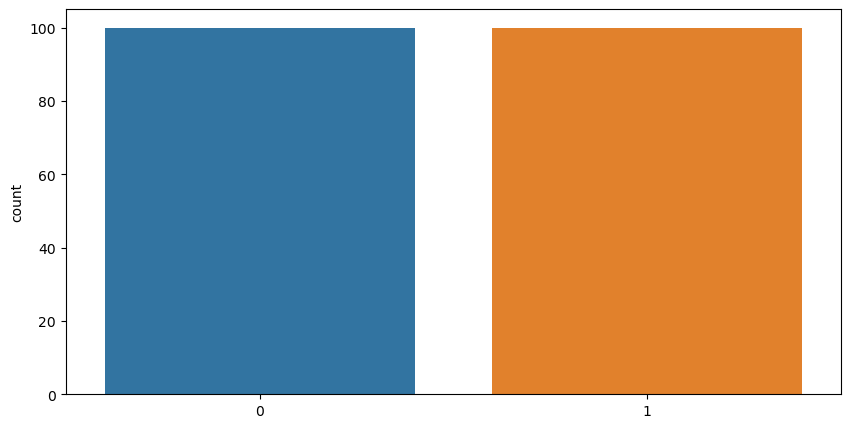

In [23]:
print(np.unique(y, return_counts=True))
plt.figure(figsize=(10,5))
sns.countplot(x=y)
plt.show()

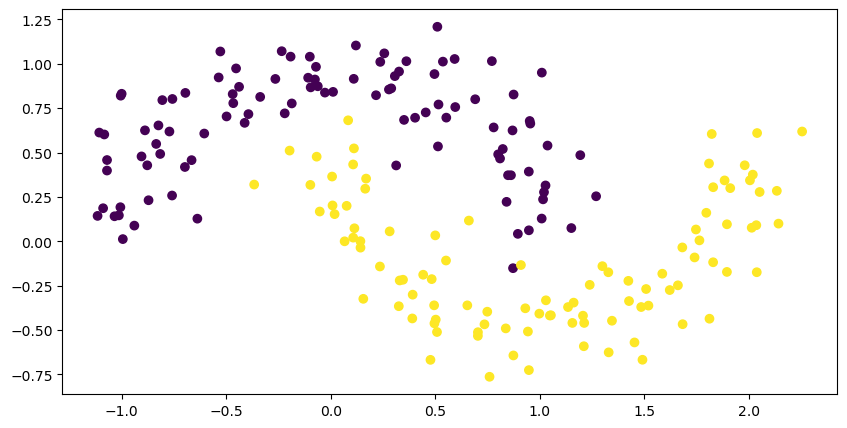

In [44]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [45]:
display(pd.DataFrame(X).describe())

,0,1
count,200.000000,200.000000
mean,0.504712,0.262698
std,0.879686,0.501545
min,-1.116143,-0.762947
25%,-0.081524,-0.174063
50%,0.500365,0.297908
75%,1.072779,0.686945
max,2.254005,1.208373


# Data preprocessing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
scaler = MinMaxScaler()

In [47]:
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

# Model training

In [52]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
               metrics=['accuracy'])

history_1 = model_1.fit(X_train_norm, y_train, epochs=30 , verbose=0)

In [53]:
loss, accuracy = model_1.evaluate(X_test_norm, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - loss: 0.3724 


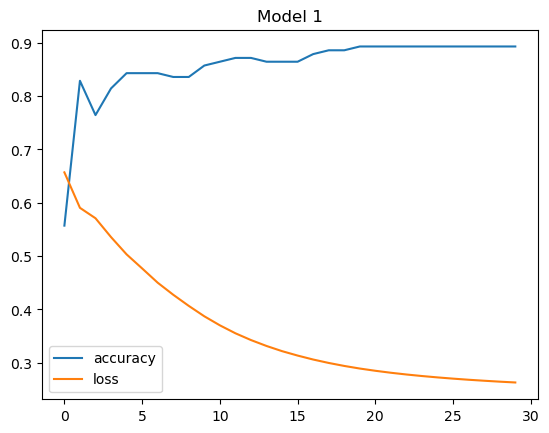

In [54]:
pd.DataFrame(history_1.history).plot(title='Model 1');

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(518, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(518, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

history_2 = model_2.fit(X_train_norm, y_train, batch_size=16, epochs=150, verbose=0)

In [131]:
loss, accuracy = model_2.evaluate(X_test_norm, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.1489 


Text(0, 0.5, 'Loss/Accuracy')

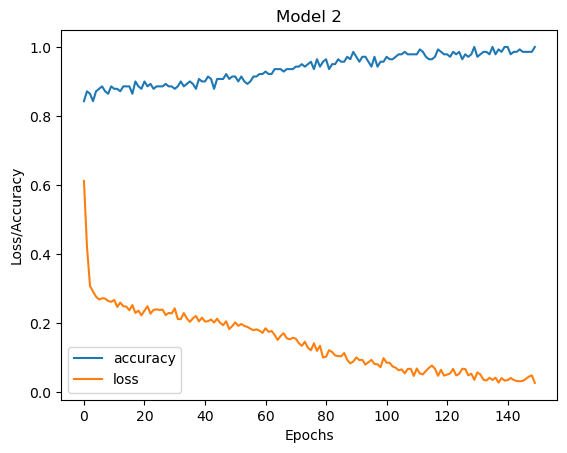

In [132]:
pd.DataFrame(history_2.history).plot(title='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')